# HW3

## Decision Trees

### Team members






### Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. Let's check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Run and check the outputs. 

### Confusion matrix plot

In [38]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Confusion matrix simple example 1

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


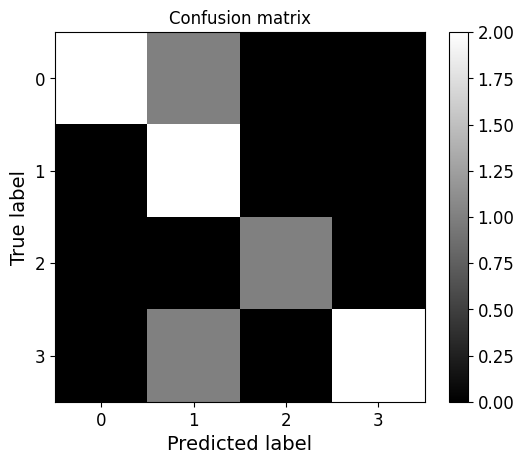

In [3]:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)

print(confusion_mat)
plot_confusion_matrix(confusion_mat, 4)

In [4]:
# Print classification report
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']

result_metrics = classification_report(y_true, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



### Confusion matrix simple example 2

[[2 2]
 [0 5]]


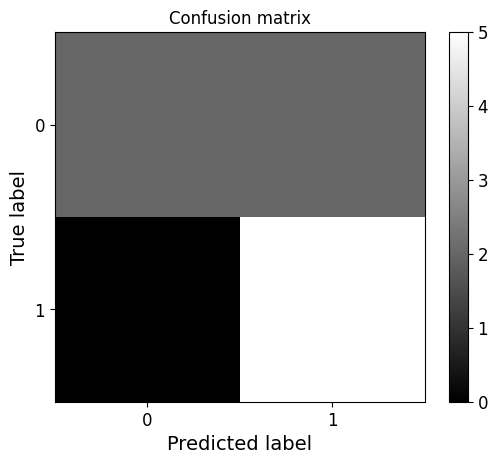

In [5]:
y_true2 = [1, 0, 0, 1, 1, 0, 1, 1, 0]
y_pred2 = [1, 1, 0, 1, 1, 0, 1, 1, 1]
confusion_mat2 = confusion_matrix(y_true2, y_pred2)

print(confusion_mat2)
plot_confusion_matrix(confusion_mat2, 2)

In [6]:
# Print classification report
target_names2 = ['Class-0', 'Class-1']

result_metrics = classification_report(y_true2, y_pred2, target_names=target_names2)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.50      0.67         4
     Class-1       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



## Data Visualization

### iris dataset before we start training and testing a model
#### use pandas  pd.plotting.scatter_matrix

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

C:\Users\priya\AppData\Local\Temp\ipykernel_15044\565035462.py:19: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)


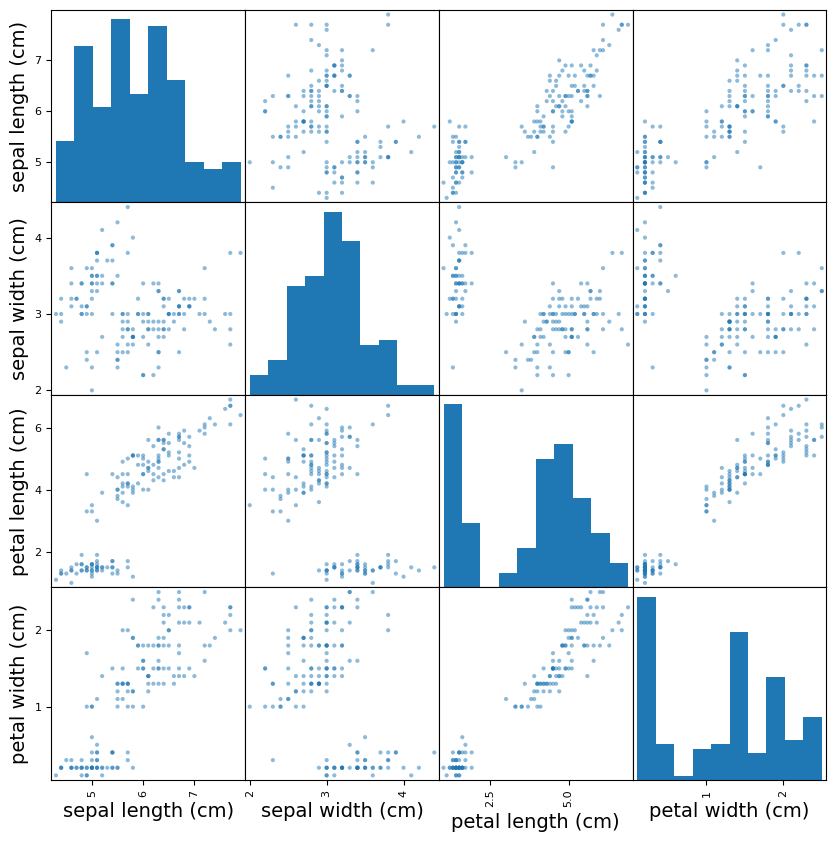

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe
iris = pd.read_csv('iris.csv')
print(iris.head())
print(iris.tail())
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
# Load some data
iris = datasets.load_iris()
print(iris['feature_names'])
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# scatter matrix plot
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

_ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)
_ = ax.set_title('Scatter matrix')
plt.show()



# Decision Trees

### Load data

- For the following code, we use sklearn.datasets package for loading a dataset instead of reading a data file stored on a local machine. 

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
#print(iris)

### Split the data to training and testing 

In [9]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training
### Learing using training data

- use Gini index measure 

*** Notes: you can also use gain information (entropy) measure by setting criterion="entropy" in the model

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Testing
### Evaluating the model using testing data

In [11]:
y_pred = tree_clf.predict(X_test)

# Visualization

## Confusion matrix

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


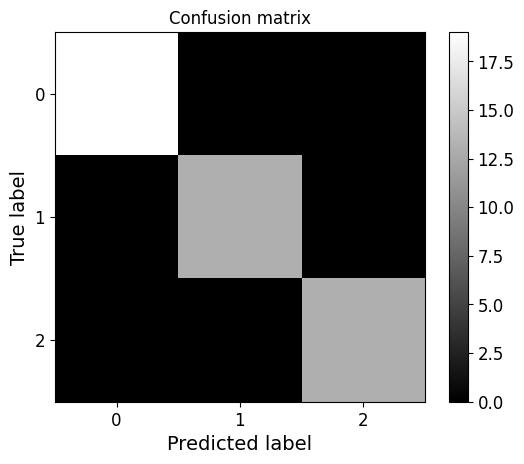

In [12]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

### Model performance summary

In [13]:
# Print classification report
target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [14]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict['setosa']['precision'])

1.0


### Draw a decision tree
notice that using graphviz is not the only method to draw decision tree.  You can also use  sklearn.tree.plot_tree

In [53]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## k-Cross Validation

- using sklearn corss_val_score() function

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, iris.data, iris.target, cv=3)

array([0.96, 0.92, 0.92])

## k-Cross Validation

- using KFold function with freedom

In [17]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 


KFold(n_splits=3, random_state=None, shuffle=True)


### Applying k-Cross Validation

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.79      0.88        14

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      0.94      0.92        18
   virginica       0.94      0.89      0.92        19

    accuracy        

# Decision Tree boundary Visualization

In [19]:
## Example  This function is meant to be used for other data besides iris.  

Saving figure decision_tree_decision_boundaries_plot


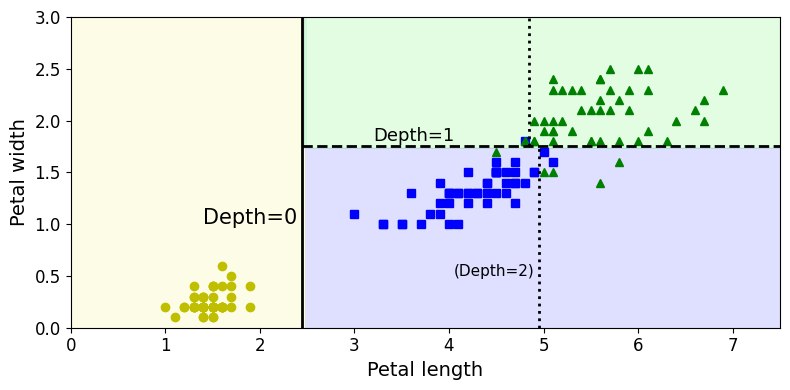

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities

In [21]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.91428571, 0.08571429]])

In [22]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to training set details

In [23]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower


array([[4.8, 1.8]])

In [24]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


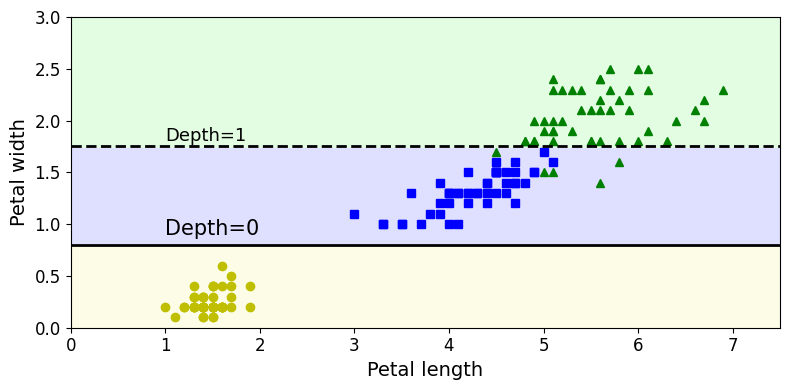

In [25]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

# =========  HW3 =============

##  ===============================

## Construct decision trees

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- Apply k=10 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 3. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results. 

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results. 

In [41]:
# Import the data, classifier, and metrics libraries similar to what we did above

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# load iris dataset and confirm data has been loaded by printing first few lines
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Print first few lines of the dataset
print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)
print("First 5 rows of the dataset:")
print(np.column_stack((X[:5], y[:5])))

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
First 5 rows of the dataset:
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]


In [43]:
# Split data into testing and training - same as code above
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105,)
Shape of y_test: (45,)


In [44]:
# Create decision tree and set criterion to information gain (entropy)
 # Create decision tree classifier with entropy criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy")

# Fit the classifier to the training data
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [66]:
import graphviz 
from sklearn.tree import export_graphviz

# Assuming clf_entropy is your decision tree classifier
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_entropy.fit(X_train, y_train)

# Export the decision tree to a Graphviz format
dot_data = export_graphviz(clf_entropy, out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Visualize the decision tree
graph = graphviz.Source(dot_data)  
graph.render("iris_decision_tree_entropy", format='png', cleanup=True)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [54]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, iris.data, iris.target, cv=3)

array([0.96, 0.92, 0.92])

In [55]:
from sklearn.model_selection import KFold

# Assuming X is your data
X = ...

# Define the number of folds
n_splits = 10

# Initialize the KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate over the splits to access the train and test indices
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"Fold {fold}:")
    print("Train indices:", train_index)
    print("Test indices:", test_index)


TypeError: Singleton array array(Ellipsis, dtype=object) cannot be considered a valid collection.

In [58]:
# Apply the 10-fold cross validation we've created
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store accuracy scores
accuracy_scores = []

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Iterate over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracy to the list
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("Accuracy scores for each fold:", accuracy_scores)
print("Mean accuracy score:", mean_accuracy)


Accuracy scores for each fold: [1.0, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 1.0, 0.8666666666666667, 0.9333333333333333]
Mean accuracy score: 0.9400000000000001


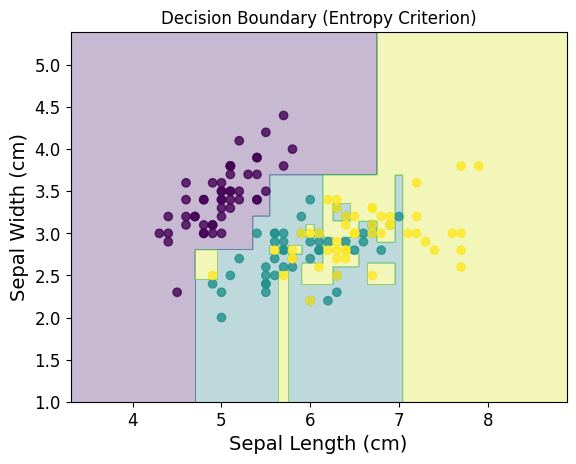

In [59]:
# Plot the decision boundry graph for the entropy model
 
#explain what is the relationship between the drawn decision bondries and gini index
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Considering only the first two features for visualization purposes
y = iris.target

# Train the Decision Tree Classifier with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Boundary (Entropy Criterion)')
plt.show()


In [60]:
# Change the depth of the decision tree to 3, 4, and  5
from sklearn.tree import DecisionTreeClassifier

# Depth 3
tree_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth_3.fit(X_train, y_train)

# Depth 4
tree_depth_4 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_depth_4.fit(X_train, y_train)

# Depth 5
tree_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_depth_5.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [61]:
# Create the 5 fold cv 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier with depth 3
tree_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)

# Perform 5-fold cross-validation
scores_5_fold = cross_val_score(tree_depth_3, X, y, cv=5)
print("5-fold cross-validation scores:", scores_5_fold)
print("Mean accuracy:", scores_5_fold.mean())


# Validate output on the tree with depth 3 

    
# Create the 7 fold cv
# Perform 7-fold cross-validation
scores_7_fold = cross_val_score(tree_depth_4, X, y, cv=7)
print("7-fold cross-validation scores:", scores_7_fold)
print("Mean accuracy:", scores_7_fold.mean())


# Validate output on the tree with depth 4 

    
# Create the 10 fold cv 
# Perform 10-fold cross-validation
scores_10_fold = cross_val_score(tree_depth_5, X, y, cv=10)
print("10-fold cross-validation scores:", scores_10_fold)
print("Mean accuracy:", scores_10_fold.mean())


# Validate output on the tree with depth 5


5-fold cross-validation scores: [0.73333333 0.83333333 0.73333333 0.8        0.63333333]
Mean accuracy: 0.7466666666666666
7-fold cross-validation scores: [0.68181818 0.72727273 0.81818182 0.66666667 0.85714286 0.76190476
 0.9047619 ]
Mean accuracy: 0.7739641311069884
10-fold cross-validation scores: [0.66666667 0.8        0.86666667 0.8        0.53333333 0.66666667
 0.86666667 0.66666667 0.6        0.86666667]
Mean accuracy: 0.7333333333333334


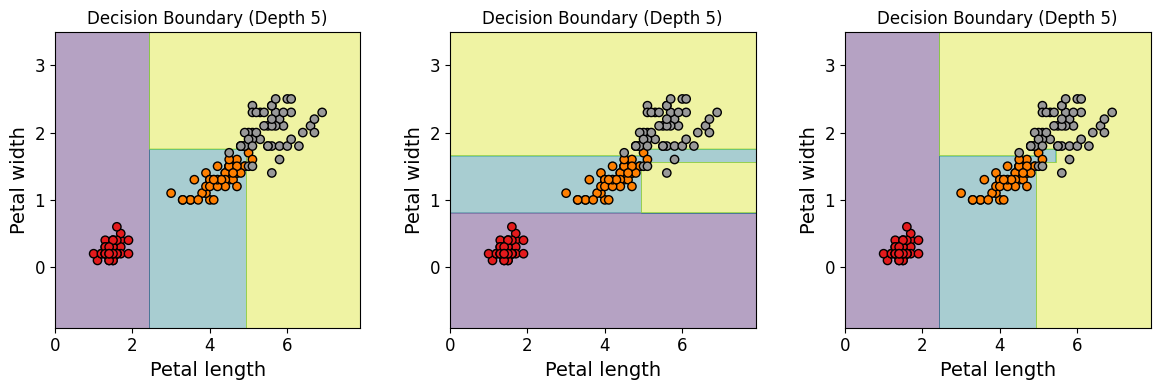

In [65]:
# Show  decision boundary graphs  for depths 3, 4, and 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # we only take the last two features
y = iris.target

# Train DecisionTreeClassifiers with different depths
depths = [3, 4, 5]
classifiers = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X, y)
    classifiers.append(clf)

# Plot decision boundaries
plt.figure(figsize=(12, 4))

for i, clf in enumerate(classifiers, 1):
    plt.subplot(1, len(classifiers), i)

    # Plot decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title(f'Decision Boundary (Depth {depth})')

plt.tight_layout()
plt.show()



In [37]:
# explain your conclusions on increasing the depth and increasing the number of folds. 